# Homework
Note: sometimes your answer doesn't match one of the options exactly. That's fine. Select the option that's closest to your solution.

In this homework, we will use the Car price dataset like last week. Download it from here.

Or you can do it with wget:

In [61]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv")

In [8]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [12]:
data = data.drop(['Engine Fuel Type','Driven_Wheels','Number of Doors', 'Market Category','Vehicle Size', 'Popularity'], axis = 1)

In [13]:
data.head(10)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
5,BMW,1 Series,2012,230.0,6.0,MANUAL,Coupe,28,18,31200
6,BMW,1 Series,2012,300.0,6.0,MANUAL,Convertible,26,17,44100
7,BMW,1 Series,2012,300.0,6.0,MANUAL,Coupe,28,20,39300
8,BMW,1 Series,2012,230.0,6.0,MANUAL,Convertible,28,18,36900
9,BMW,1 Series,2013,230.0,6.0,MANUAL,Convertible,27,18,37200


Lowercase the column names and replace spaces with underscores

In [14]:
data.columns = data.columns.str.replace(' ', '_').str.lower()

In [19]:
data.head(10)

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
5,BMW,1 Series,2012,230.0,6.0,MANUAL,Coupe,28,18,31200
6,BMW,1 Series,2012,300.0,6.0,MANUAL,Convertible,26,17,44100
7,BMW,1 Series,2012,300.0,6.0,MANUAL,Coupe,28,20,39300
8,BMW,1 Series,2012,230.0,6.0,MANUAL,Convertible,28,18,36900
9,BMW,1 Series,2013,230.0,6.0,MANUAL,Convertible,27,18,37200


Fill the missing values with 0

In [15]:
data.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [16]:
data = data.fillna(0)

In [17]:
data.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [20]:
average = data['msrp'].mean()
average

40594.737032063116

In [22]:
data.msrp = (data.msrp > average).astype(int)

In [24]:
data.rename(columns={'msrp':'above_average'}, inplace=True)

In [25]:
data

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [28]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [29]:
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [30]:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [37]:
numerical = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']
categorical = ['make', 'model', 'transmission_type', 'vehicle_style']
numerical

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

# Question 1: ROC AUC feature importance
ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

For each numerical variable, use it as score and compute AUC with the above_average variable
Use the training dataset for that
If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['engine_hp'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

engine_hp
engine_cylinders
highway_mpg
city_mpg

In [38]:
df_train[numerical]

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg
0,2016,280.0,6.0,28,27
1,2014,300.0,6.0,30,18
2,2016,259.0,4.0,27,19
3,2015,280.0,6.0,25,17
4,2016,283.0,6.0,25,17
...,...,...,...,...,...
7143,2015,148.0,4.0,33,24
7144,2016,325.0,6.0,24,17
7145,2017,130.0,4.0,37,32
7146,1991,162.0,5.0,20,16


In [85]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [45]:
numerical

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [35]:
df_train.year

0       2016
1       2014
2       2016
3       2015
4       2016
        ... 
7143    2015
7144    2016
7145    2017
7146    1991
7147    2003
Name: year, Length: 7148, dtype: int64

In [41]:
roc_auc_score(y_train, df_train.year)

0.687551492804683

In [42]:
roc_auc_score(y_train, df_train.engine_hp)

0.9171031265539011

In [43]:
roc_auc_score(y_train, df_train.engine_cylinders)

0.766116490165669

In [48]:
roc_auc_score(y_train, -df_train.highway_mpg)

0.6330587871772013

In [49]:
roc_auc_score(y_train, -df_train.city_mpg)

0.6734244643245233

In [54]:
fpr, tpr, _ = roc_curve(y_train, df_train.city_mpg)

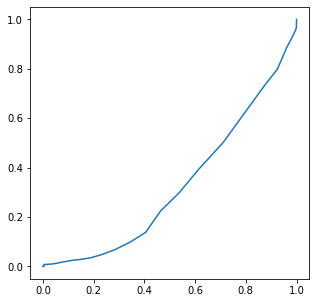

In [55]:
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr)

<AxesSubplot:xlabel='city_mpg', ylabel='Count'>

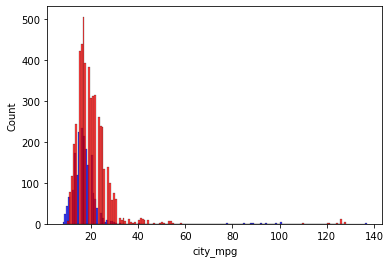

In [67]:
sns.histplot(df_train.city_mpg[y_train ==1], color = 'blue')
sns.histplot(df_train.city_mpg[y_train ==0], color = 'red')

In [70]:
for c in numerical:
    auc = roc_auc_score(y_train, df_train[c])
    if auc > 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
    print(c,auc)

year 0.31244850719531714
engine_hp 0.0828968734460988
engine_cylinders 0.23388350983433104
highway_mpg 0.3669412128227987
city_mpg 0.3265755356754767


# engine_hp

# Question 2: Training the model
Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
What's the AUC of this model on the validation dataset? (round to 3 digits)

0.678
0.779
0.878
0.979

In [71]:
features = numerical+categorical

In [87]:
from sklearn.feature_extraction import DictVectorizer

In [88]:
train_dict = df_train[features].to_dict(orient='records')

In [95]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)

In [90]:
from sklearn.linear_model import LogisticRegression

In [96]:
model = LogisticRegression (solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [98]:
val_dict = df_val[features].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]

In [100]:
roc_auc_score(y_val, y_pred).round(3)

0.98

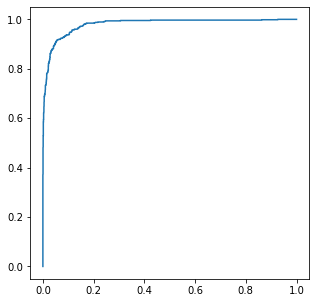

In [101]:
plt.figure(figsize=(5,5))
fpr, tpr, _ = roc_curve(y_val, y_pred)
plt.plot(fpr, tpr)

#0.98

# Question 3: Precision and Recall
Now let's compute precision and recall for our model.

Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
For each threshold, compute precision and recall
Plot them
At which threshold precision and recall curves intersect?

0.28
0.48
0.68
0.88

In [102]:
#@ CREATING CONFUSION MATRIX:
def confusion_matrix_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    
    return df_scores


#@ IMPLEMENTATION OF FUNCTION:
df_scores = confusion_matrix_dataframe(y_val, y_pred)
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,654,1729,0,0
10,0.1,644,329,10,1400
20,0.2,626,205,28,1524
30,0.3,608,143,46,1586
40,0.4,595,89,59,1640
50,0.5,576,69,78,1660
60,0.6,549,46,105,1683
70,0.7,504,26,150,1703
80,0.8,454,12,200,1717
90,0.9,367,3,287,1726


In [103]:
df_scores = confusion_matrix_dataframe(y_val, y_pred )

In [104]:
df_scores['p'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['r'] = df_scores.tp / (df_scores.tp + df_scores.fn)

In [105]:
df_scores[::10]

,threshold,tp,fp,fn,tn,p,r
0,0.0,654,1729,0,0,0.274444,1.000000
10,0.1,644,329,10,1400,0.661871,0.984709
20,0.2,626,205,28,1524,0.753309,0.957187
30,0.3,608,143,46,1586,0.809587,0.929664
40,0.4,595,89,59,1640,0.869883,0.909786
50,0.5,576,69,78,1660,0.893023,0.880734
60,0.6,549,46,105,1683,0.922689,0.839450
70,0.7,504,26,150,1703,0.950943,0.770642
80,0.8,454,12,200,1717,0.974249,0.694190
90,0.9,367,3,287,1726,0.991892,0.561162


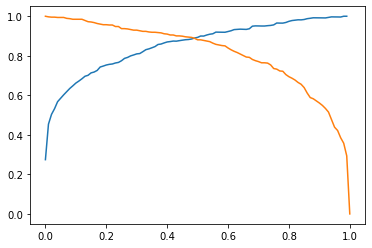

In [106]:
plt.plot(df_scores.threshold, df_scores.p)
plt.plot(df_scores.threshold, df_scores.r)

# 0.48

# Question 4: F1 score
Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

 

Where 
 is precision and 
 is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

0.12
0.32
0.52
0.72

In [109]:
df_scores['f1']  = 2*df_scores.p*df_scores.r/(df_scores.p+df_scores.r)

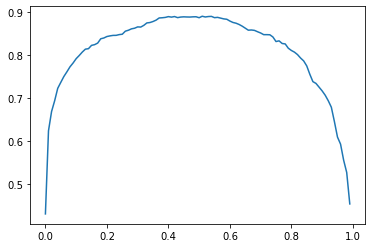

In [108]:
#plt.figure(figsize=(5,5))
#fpr, tpr, _ = roc_curve(y_val, y_pred)
plt.plot(df_scores.threshold , df_scores.f1)

In [112]:
df_scores.set_index('threshold').f1.argmax()

51

In [113]:
df_scores.iloc[df_scores.f1.argmax()]

threshold       0.510000
tp            576.000000
fp             64.000000
fn             78.000000
tn           1665.000000
p               0.900000
r               0.880734
f1              0.890263
Name: 51, dtype: float64

# 0.52


# Question 5: 5-Fold CV
Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)
Iterate over different folds of df_full_train
Split the data into train and validation
Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
Use AUC to evaluate the model on validation
How large is standard devidation of the scores across different folds?

0.003
0.030
0.090
0.140

In [124]:
#@ DEFINING TRAIN AND PREDICT FUNCTION:
def train(df_train, y_train, C=1.0):
    dicts = df_train[features].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

def predict(df, dv, model):
    dicts = df[features].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [119]:
from sklearn.model_selection import KFold

In [129]:
scores = []
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.above_average.values
    y_val = df_val.above_average.values

    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.979 +- 0.002


# Question 6: Hyperparemeter Tuning
Now let's use 5-Fold cross-validation to find the best parameter C

Iterate over the following C values: [0.01, 0.1, 0.5, 10]
Initialize KFold with the same parameters as previously
Use these parametes for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
Compute the mean score as well as the std (round the mean and std to 3 decimal digits)
Which C leads to the best mean score?

0.01
0.1
0.5
10
If you have ties, select the score with the lowest std. If you still have ties, select the smallest C.